# Групповой проект №1. Первичный анализ данных "Международные авиаперевозки в США"

<img src="https://image.shutterstock.com/z/stock-vector-set-of-vector-tags-with-usa-airport-codes-vector-illustration-for-travelers-famous-american-451061281.jpg" height="400" />

Данные взяты из [отчета по статистике международных авиапассажирских и грузовых перевозок США](https://www.transportation.gov/policy/aviation-policy/us-international-air-passenger-and-freight-statistics-report#TheReports).

Этот же датасет, но в гугл драйв: https://drive.google.com/drive/folders/1P3i89WzfkVmC2L53G9qQxjzWJ3NSanat?usp=sharing

В ноутбуке скачивание данных происходит по ссылке с гугл-драйв, просьба не изменять.


Доступен следующий набор данных:

- **International_Report_Passengers.csv**: данные об общем количестве пассажиров за каждый месяц и год между парой аэропортов, обслуживаемых конкретной авиакомпанией.
Данные о пассажирах и грузоперевозках в США являются конфиденциальными в первые 6 месяцев, после чего они могут быть опубликованы. Количество пассажиров записывается в трех столбцах: «По расписанию», «Чартер» и «Всего»: "Scheduled", "Charter", "Total".

Описание атрибутов доступно по ссылке: https://data.transportation.gov/Aviation/International_Report_Passengers/xgub-n9bw


## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на занятии.  
Ссылка на шаблон к презентации: [ссылка](https://docs.google.com/presentation/d/1eydwcHaGKznePEbFuRT810cEGLgB3YYqpy-cDeRx_ik/edit?usp=sharing).  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

**Вопросы, на которые нужно ответить в презентации перечислены в ноутбуке.**

Любой хороший data-scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

При возникновении каких-либо проблем при выполнении группового проекта обязательно сразу пишите Екатерине (@poka_katt). 

## Требования к оформлению графиков (в ноутбуке и в презентации)

1. Каждый график необходимо подписывать
2. Оси Х и У всегда подписаны
3. Выбрана подходящая шкала и шаг 
4. Не забывайте про логарифмическую шкалу и всегда используйте при необходимости!


# Итак, приступим

Импортируем необходимые библиотеки

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Загрузим International_Report_Passengers.csv

In [4]:
url='https://drive.google.com/file/d/1nvi3GFkmZDXSbLrTe_ZmyNAjZGQ74A4D/view?usp=sharing'

url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df1 = pd.read_csv(url2, delimiter=',')
df1.dataframeName = 'International_Report_Passengers.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 693122 rows and 16 columns


## Посмотрим на наш датасет

In [5]:
df1

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,07/01/2004,2004,7,14747,SEA,93,16229,YVR,906,19687,QX,1,Passengers,19265,0,19265
1,11/01/2008,2008,11,11697,FLL,33,12010,GUA,127,20416,NK,1,Passengers,3099,0,3099
2,10/01/2002,2002,10,10257,ALB,22,16271,YYZ,936,20206,QK,0,Passengers,33,0,33
3,03/01/2007,2007,3,12889,LAS,85,13165,MAN,493,19541,BD,0,Passengers,3815,0,3815
4,03/01/2009,2009,3,12892,LAX,91,13252,MEX,148,19534,AM,0,Passengers,17993,0,17993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693117,03/01/2021,2021,3,99999,ZZZ,1,11519,EIS,282,21743,2LQ,1,Passengers,0,16,16
693118,03/01/2021,2021,3,99999,ZZZ,1,11731,FPO,204,21743,2LQ,1,Passengers,0,9,9
693119,03/01/2021,2021,3,99999,ZZZ,1,13605,NAS,204,21743,2LQ,1,Passengers,0,19,19
693120,03/01/2021,2021,3,99999,ZZZ,1,14682,SAQ,204,21743,2LQ,1,Passengers,0,77,77


## Отсортируем данные по дате

In [6]:
df1.sort_values(by=['Year','Month'], inplace=True)
#Аргумент «inplace = True» означает, что фрейм данных должен сделать изменения постоянными,
#То есть сохранит изменения в загруженной таблице (у нас это df1)

In [7]:
df1

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
294485,01/01/1990,1990,1,11042,CLE,44,11032,CUN,148,19892,ACQ,0,Passengers,0,796,796
294617,01/01/1990,1990,1,12892,LAX,91,14228,PPT,823,19508,UT,0,Passengers,1790,0,1790
294655,01/01/1990,1990,1,13495,MSY,72,11032,CUN,148,19556,LR,0,Passengers,1515,0,1515
294671,01/01/1990,1990,1,12173,HNL,2,16232,YWG,926,19523,CP,0,Passengers,2370,0,2370
294762,01/01/1990,1990,1,13303,MIA,33,10846,BZE,106,20144,TX,0,Passengers,6489,0,6489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693117,03/01/2021,2021,3,99999,ZZZ,1,11519,EIS,282,21743,2LQ,1,Passengers,0,16,16
693118,03/01/2021,2021,3,99999,ZZZ,1,11731,FPO,204,21743,2LQ,1,Passengers,0,9,9
693119,03/01/2021,2021,3,99999,ZZZ,1,13605,NAS,204,21743,2LQ,1,Passengers,0,19,19
693120,03/01/2021,2021,3,99999,ZZZ,1,14682,SAQ,204,21743,2LQ,1,Passengers,0,77,77


# Посмотрим на кол-во записей в таблице для 2010-2020 годов

In [8]:
# 1ый способ:
n_flights = df1.loc[df1['Year']==2010]
print(len(n_flights))

23551


In [9]:
# 2ой способ
n_flights = df1.query('Year==2010')
print(len(n_flights))

23551


 Согласитесь второй способ (с использованием "query") удобнее и красивее?

In [10]:
# можно писать несколько условий
df1.query("Year==2020 & Month==3 & carrier=='RV'").head(3)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
671596,03/01/2020,2020,3,11697,FLL,33,16149,YOW,936,21610,RV,0,Passengers,4280,0,4280
671601,03/01/2020,2020,3,11697,FLL,33,16217,YUL,941,21610,RV,0,Passengers,40105,0,40105
671611,03/01/2020,2020,3,11697,FLL,33,16271,YYZ,936,21610,RV,0,Passengers,29844,0,29844


In [11]:
years_to_check = np.arange(2010, 2022)

for year in years_to_check:
    n_flights = df1.query('Year=='+str(year))
    print(f"Для {year} года в таблице {len(n_flights)} записей.") #Как видите, в методе print() для вывода использован f-string.
                                                                    #Почитать подробнее можно здесь: https://realpython.com/python-f-strings/

Для 2010 года в таблице 23551 записей.
Для 2011 года в таблице 24516 записей.
Для 2012 года в таблице 24070 записей.
Для 2013 года в таблице 24464 записей.
Для 2014 года в таблице 25843 записей.
Для 2015 года в таблице 27234 записей.
Для 2016 года в таблице 28645 записей.
Для 2017 года в таблице 29998 записей.
Для 2018 года в таблице 30667 записей.
Для 2019 года в таблице 30436 записей.
Для 2020 года в таблице 15868 записей.
Для 2021 года в таблице 4183 записей.


В методе print() для вывода использован f-string. Почитать подробнее можно здесь: https://realpython.com/python-f-strings/

In [12]:
# Проверим пропуски
df1.isna().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

# Задание 1. Пассажирский трафик
Вопрос 1: Постройте график изменения кол-ва перевезенных людей (столбец Total) за январь-декабрь 2019 года и за январь-декабрь 2020. Можно построить в два графика или отразить 2 кривые на одном (второй вариант предпочтительнее, но тогда не забудьте изменить цвет у кривых). Какой вывод можно сделать исходя из графиков?

Ответ:


In [13]:
df2019 = df1[df1['Year'] == 2019] 
df2020 = df1[df1['Year'] == 2020] #выбраны только строки по 2020 году и 2019 году соответственно 
total_2019 = df2019.groupby(by ='Month').sum()['Total']/1000000
total_2020 = df2020.groupby(by ='Month').sum()['Total']/1000000 #Группировка по месяцам для суммирования столбца тотал, перевод в млн человек для более удобного отображения на графике 

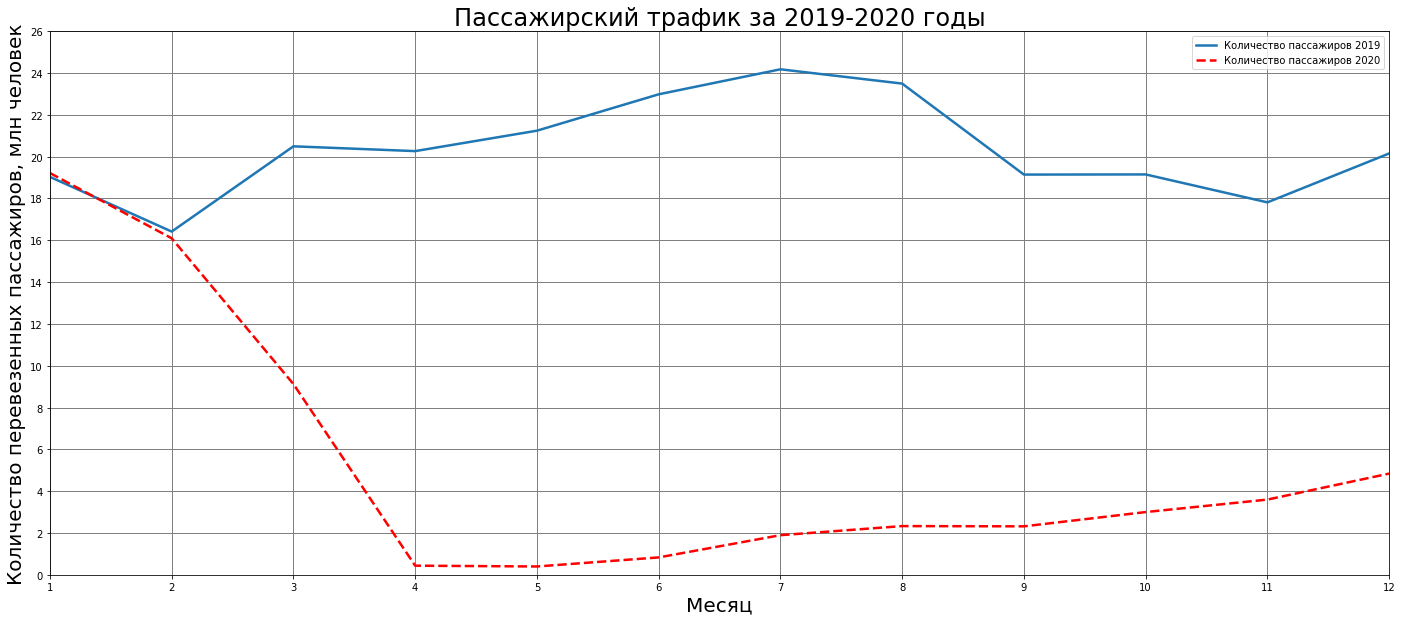

In [14]:
# График изменения кол-ва перевезенных людей (столбец Total). 
# По моему мнению лучше всего подойдет обычный график, на котором отетливо видно и динамику столбца тотал по одному году и разница между годами
ax = plt.figure(figsize=(24,10))
total_2019.plot(label= "Количество паcсажиров 2019", linewidth = 2.5)
ax1 = total_2020.plot(color = 'red', linestyle = '--', 
                      label= "Количество паcсажиров 2020", linewidth = 2.5)
plt.title('Пассажирский трафик за 2019-2020 годы', fontsize = 24)
plt.xlabel('Месяц', fontsize = 20)
plt.ylabel('Количество перевезенных пассажиров, млн человек', fontsize = 20)
plt.yticks(range(0,27,2))
plt.ylim(0,26)
plt.xticks(range(13))
plt.xlim(1,12)
plt.legend()
plt.grid(color='grey', linewidth=1)
ax1.set_facecolor(color='w')
plt.show()

Вопрос 2: как изменился (в процентах) трафик между США и другими странами в период с января по декабрь 2020 года по сравнению с январем-декабрем 2019 года? (трафик=кол-во перевезенных за месяц людей). Изобразите в виде графика: по оси Х - месяц+год, по оси У - изменение трафика в процентах.

Ответ:

In [15]:
total_2019 = total_2019.reset_index()
total_2020 = total_2020.reset_index()
# Смержил таблицы 2019 и 2020 по месяцам, чтоб вычислить процент измененния 
# Подобное делаю в задании 2.2 
total_2019.rename(columns ={'Total':'Total_2019', 'Month':'Month_2019'}, inplace = True)
total_2020.rename(columns = {'Total':'Total_2020', 'Month':'Month_2020'}, inplace = True)
total = total_2019.merge(total_2020, left_on ='Month_2019', right_on = 'Month_2020')
total['percent'] =round((-total['Total_2019']+total['Total_2020'])/total['Total_2019']*100,1)

In [16]:
total = total.reset_index(drop = True)
total.index = total['Month_2019']

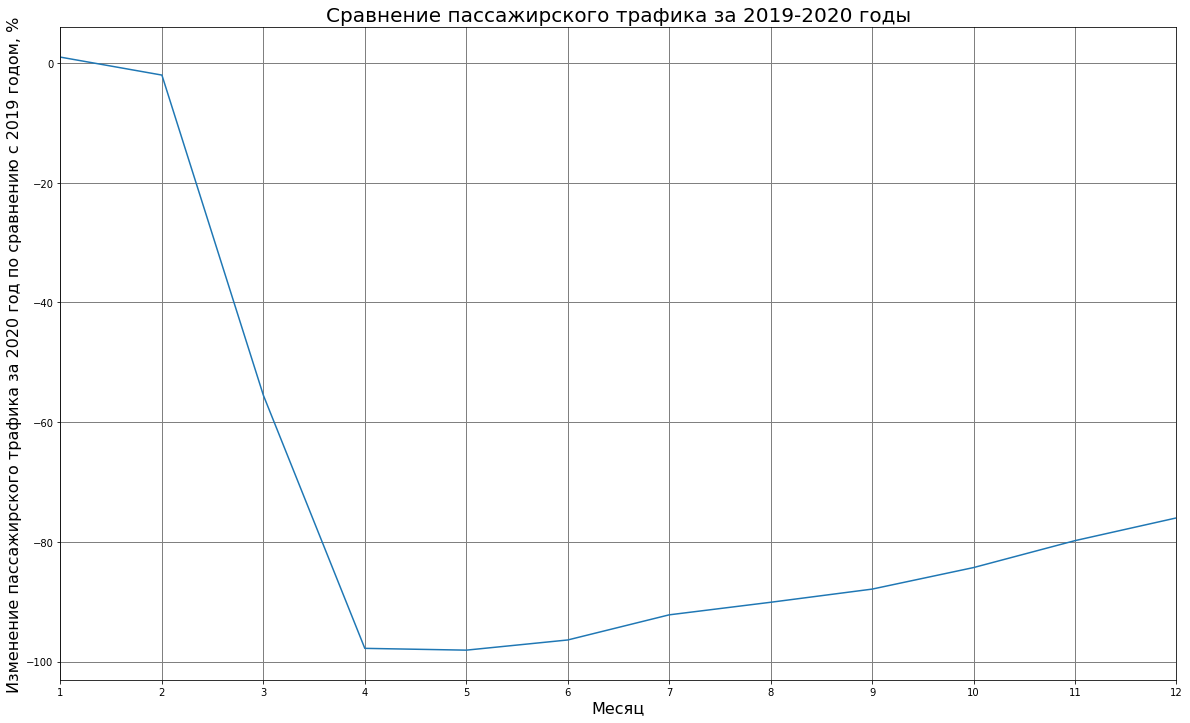

In [17]:
# График изменения % перевезенных людей (столбец Total). 
# По моему мнению лучше всего подойдет обычный график, на котором отетливо видно и динамику процента изменения перевезенных людей
ax = plt.figure(figsize=(20,12))
ax1 = total['percent'].plot() 
plt.title('Сравнение пассажирского трафика за 2019-2020 годы', fontsize = 20)
plt.xlabel('Месяц', fontsize = 16)
plt.ylabel('Изменение пассажирского трафика за 2020 год по сравнению с 2019 годом, %', fontsize = 16)
plt.xticks(range(13))
plt.xlim(1,12)
plt.grid(color='grey', linewidth=1)
ax1.set_facecolor(color='w')
plt.show()

# Задание 2. Загруженность авиакомпаний

Вопрос 1: Нарисуйте топ 5 популярных авиакомпаний (airlineid, carrier) за все года (1990-2021). По оси Х на графике укажите название авикомпании (БЕЗ кода), по оси У - кол-во перевезенных людей за все года.

Ответ:

In [18]:
grouped1 = df1.groupby('airlineid')
A = grouped1['Total'].sum()
A = A.sort_values(ascending=False)
AA = A.head(5)
AA

airlineid
19805    595045474
19977    421801116
19790    387619198
19540    173910674
19704    173862884
Name: Total, dtype: int64

In [19]:
grouped2 = df1.groupby('carrier')
B = grouped2['Total'].sum()
B = B.sort_values(ascending=False)
BB = B.head(5)
top5 = BB.index.to_list()



In [20]:
df_carrier_total = BB.copy()
dict_of_carrier = {"AA":"American Airlines", "UA":"United Airlines","DL":"Delta Air Lines", "BA":"British Airways", "CO":"Northwest Airlines","S6":"Sunrise Airways S.A. dba Sunrise Airways","SKB":"Skybus Airlines","B6":"JetBlue Airways"}
df_carrier_total = df_carrier_total.rename(index=dict_of_carrier)
Bdf_carrier_totalB = df_carrier_total.to_frame()
df_carrier_total = df_carrier_total.reset_index()
df_carrier_total

,carrier,Total
0,American Airlines,595045474
1,United Airlines,421801116
2,Delta Air Lines,387619198
3,British Airways,173910674
4,Northwest Airlines,173862884


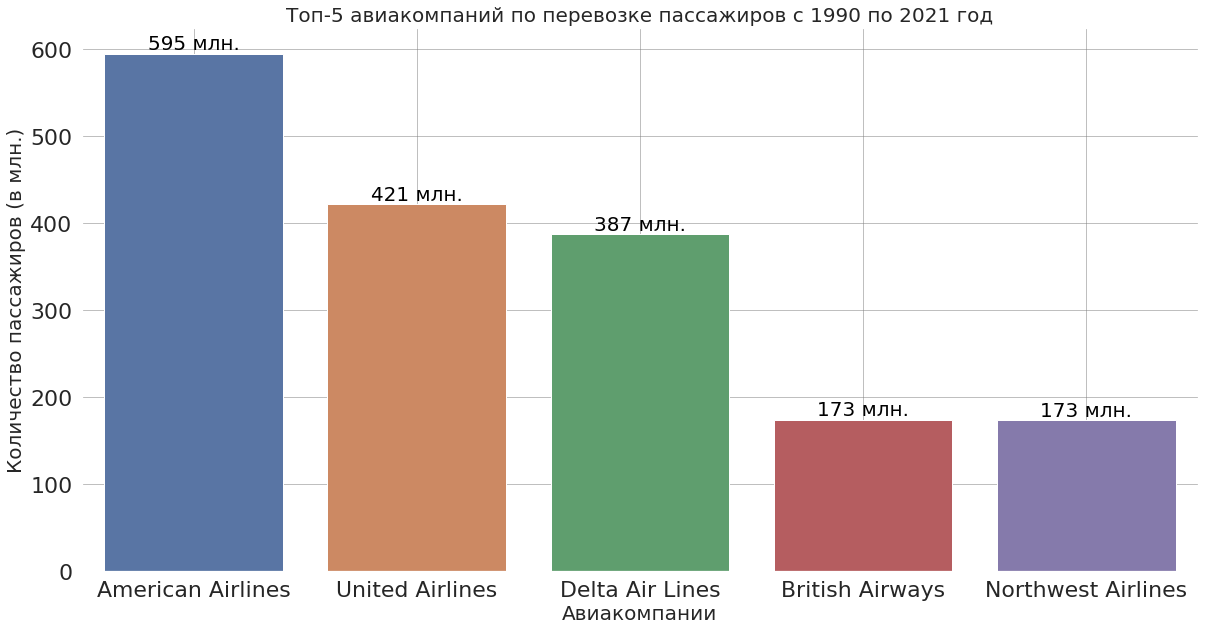

In [21]:
import matplotlib.ticker as ticker
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
g = sns.barplot(x='carrier',
            y='Total',
            data=df_carrier_total,
            )
plt.ticklabel_format(style='plain', axis='y')

ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
g.yaxis.set_major_formatter(ticks_y)

for index, row in df_carrier_total.iterrows():
    g.text(row.name, row.Total, str(int(row.Total/1e6))+' млн.', color='black', ha="center", va="bottom", size=20)

plt.title('Топ-5 авиакомпаний по перевозке пассажиров с 1990 по 2021 год', size = 20)
plt.xlabel('Авиакомпании', size = 20)
plt.ylabel('Количество пассажиров (в млн.)', size = 20)
plt.grid(color='grey', linewidth=0.5)
g.set_facecolor(color='w')
plt.show()

Вопрос 2: Какая авиакомпания самая "быстрорастущая", если оценивать рост по кол-ву перевезенных людей? Какая компания теряет клиентов?

Ответ:

In [22]:
# Словарь авиокомпаний для приведения на графике их в нормальный вид
dict_of_carrier = {"AA":"American Airlines", "UA":"United Airlines","DL":"Delta Air Lines", "BA":"British Airways","B6":"JetBlue Airways", 'EV':'ExpressJet', 'RV':'Air Canada Rouge'}

In [23]:
df5 = df1.copy()
# Группировка для расчета суммы тотала по годам, тотал также приведен в миллионы
# Добавление столбца со следующим годом для мержа саму на себя чтоб сравнить тоталы между соседними годами 
df5_g = df5.groupby(by = ['Year','carrier']).sum()['Total'].reset_index()
df5_g['Next_year'] = df5_g['Year'] + 1
df5_g['Total'] = df5_g['Total'] / 1000000
df5_g1 = df5_g.copy()
df6 = df5_g.merge(df5_g, left_on=['carrier', 'Next_year'], right_on=['carrier','Year'])
# Оставляем только нужные столбца и считаем процент изменения от года к году
df6 = df6.iloc[:, :6]
df6['percent'] = (df6['Total_y'] - df6['Total_x']) / df6['Total_x'] *100

последние 6 лет до пандемии взят как промежуток времени на котором отчетливо можно видеть динамику компании развитие или регрессию, на диапазоне 1-2 года нельзя делать существенные выводы.


In [24]:
df8 = df6.copy()
df8 = df8[df8['Year_x'] >= 2013]
df8 = df8[df8['Year_x'] < 2019]
df9 = df8.groupby(by = 'carrier').agg(['count','mean','min','max'])['percent'].reset_index().copy()

Для быстрорастущих взяты компании, у которых все проценты от года к году больше -3%, то есть в какой то год могла быть небольшая просадка, но в целом положительная динамика сохранялась и посчитан средний процент прироста и взята компания с максимальным процентом прироста. Для быстрорастущих отсеяны компании у которых были значительные отрицательные проценты, для падающих положительные. Так как компанию, сложно назвать компанию растущей если она постоянно катается на "американских горках", хотя и в целом её динамика и положительная. Аналогично для падающих компаний

In [25]:
df9 = df9[df9['count']>5]
df9 = df9[df9['min']>-3].sort_values('mean',ascending = False).head(1)
compani2015_2018_plus_persent = df9['carrier'].to_list()

In [26]:
df10 = df6.copy()
df10 = df10[df10['Year_x'] >= 2013]
df10 = df10[df10['Year_x'] < 2019]
df11 = df10.groupby(by = 'carrier').agg(['count','mean','min','max'])['percent'].reset_index().copy()
df11 = df11[df11['count']>5]
df11 = df11[df11['max']<3].sort_values('mean').head(1)
compani2015_2018_minus_persent = df11['carrier'].to_list()

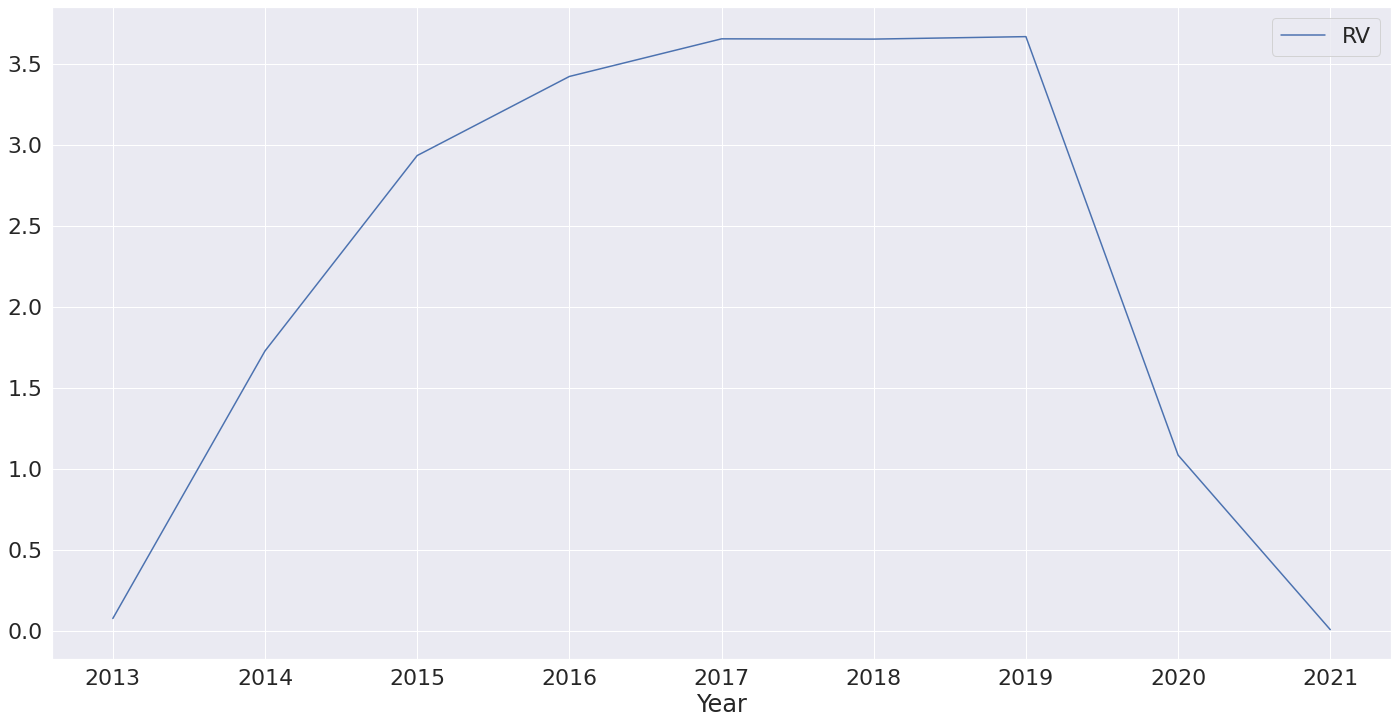

In [27]:
#Пробный график 
ax = plt.figure(figsize=(24,12))
df5_com = df5_g.reset_index(drop = True).copy()
df5_com.index = df5_com['Year']
for i in compani2015_2018_plus_persent:
  df5_com[df5_com['carrier'] == i]['Total'].plot(label = i)
  plt.legend() 

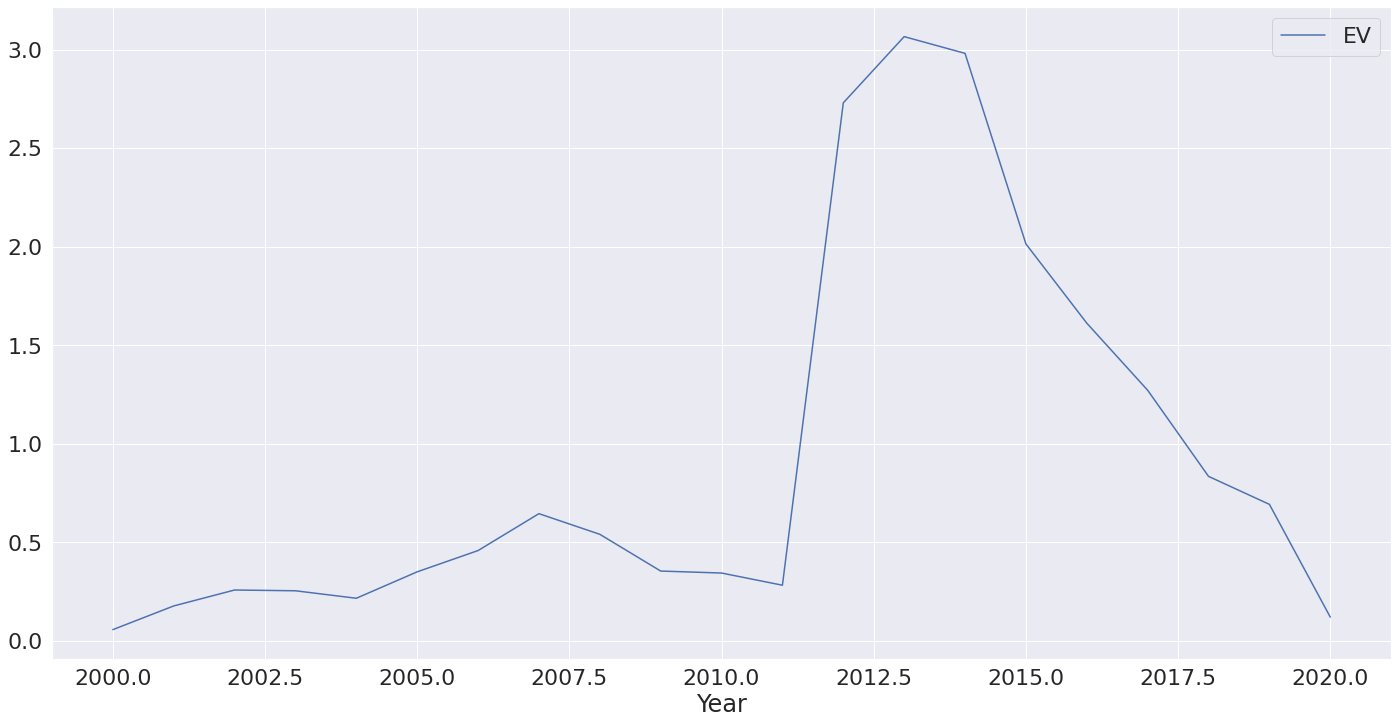

In [28]:
#Пробный график
ax = plt.figure(figsize=(24,12))
df5_com_m = df5_g.reset_index(drop = True).copy()
df5_com_m.index = df5_com['Year']
for i in compani2015_2018_minus_persent:
  df5_com_m[df5_com_m['carrier'] == i]['Total'].plot(label = i)
  plt.legend() 

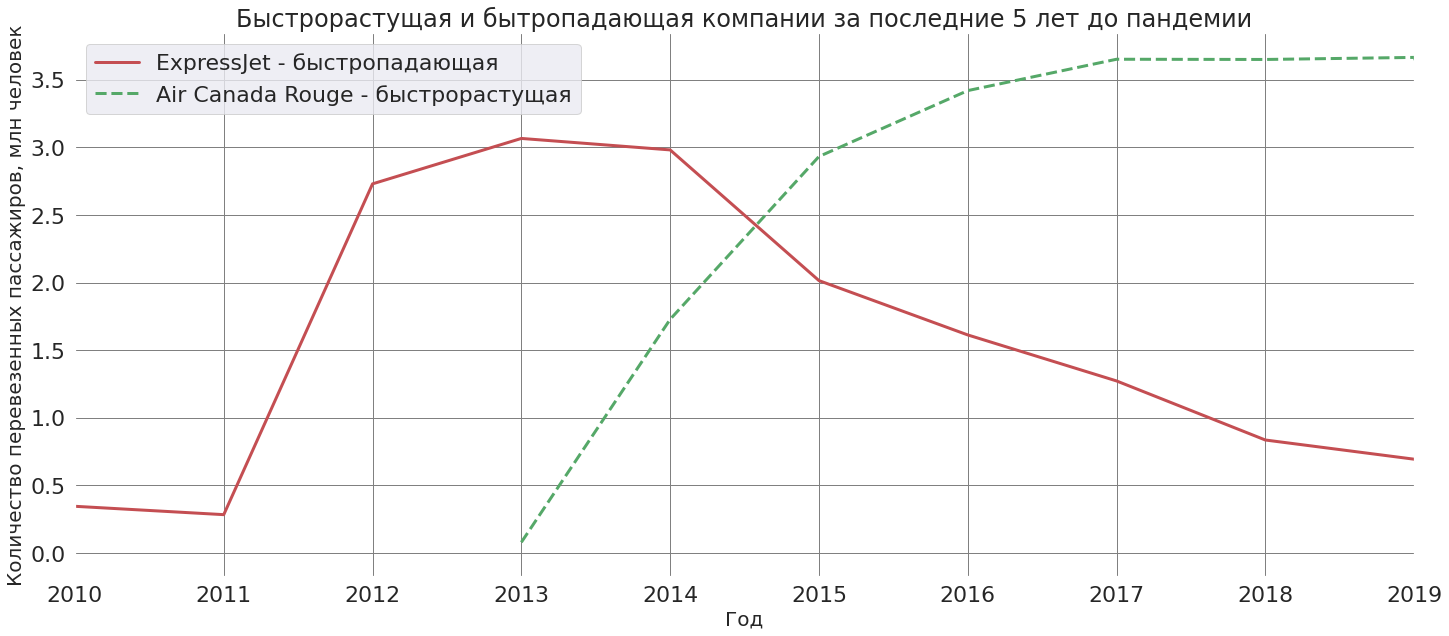

In [29]:
# График изменения % перевезенных людей (столбец Total). 
# По моему мнению лучше всего подойдет обычный график, на котором отетливо видно и динамику процента изменения перевезенных людей
ax = plt.figure(figsize=(24,10))
df5_com_m = df5_g.reset_index(drop = True).copy()
df5_com_m.index = df5_com['Year']
for i in compani2015_2018_minus_persent:
  df5_com_m[df5_com_m['carrier'] == i]['Total'].plot(label = dict_of_carrier[i] + ' - быстропадающая', color ='r', linewidth = 3 )
  plt.legend() 
df5_com = df5_g.reset_index(drop = True).copy()
df5_com.index = df5_com['Year']
for i in compani2015_2018_plus_persent:
  ax1 = df5_com[df5_com['carrier'] == i]['Total'].plot(label = dict_of_carrier[i] + ' - быстрорастущая', color ='g', linestyle = '--', linewidth = 3)
  plt.legend() 
plt.xticks(range(2010,2020,1))
plt.xlim(2010,2019)
plt.title('Быстрорастущая и бытропадающая компании за последние 5 лет до пандемии', fontsize = 24)
plt.xlabel('Год', fontsize = 20)
plt.grid(color='grey', linewidth=1)
ax1.set_facecolor(color='w')
plt.ylabel('Количество перевезенных пассажиров, млн человек', fontsize = 20)
plt.show()

# Задание 3. Загруженность аэропортов

Вопрос 1: Нарисуйте топ 5 по загруженности аэропортов В США за все года (1990-2021). По оси Х на графике укажите код аэропорта + город, в котором он находится (город по коду придется найти в открытых источниках), по оси У - кол-во перевезенных людей за все года. Для кодировки аэропортов используется код IATA (International Air Transport Association airport code).

Ответ:


In [30]:
df1_31 = df1.groupby('usg_apt').sum().sort_values(by=['Total'],ascending=False).reindex().head(5)
df1_31

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
usg_apt,,,,,,,,,,,
JFK,130495051,421330,812130630,1431870,845582769,28380467,1296302259,31037,630414750,7289998,637704748
LAX,97567221,314687,627195800,4427150,655012115,23260973,969170541,14718,491938882,2659809,494598691
MIA,126246037,404660,837729819,2078109,812988450,18926355,1256176464,32708,475951720,16643691,492595411
ORD,71405856,226165,495796560,1459272,479944061,17599657,709498422,19965,284514844,6545765,291060609
EWR,67393426,217787,390062732,719328,447594499,16166733,668810468,22009,257161067,3037917,260198984


In [31]:
tips31 = {'JFK':'JFK, New York City', 
        'LAX':'LAX, Los Angeles', 
        'MIA':'MIA, Miami', 
        'ORD':"ORD, Chicago", 
        'EWR':'EWR, New Jersey'}

In [32]:
df1_31.rename(index=tips31,inplace=True)

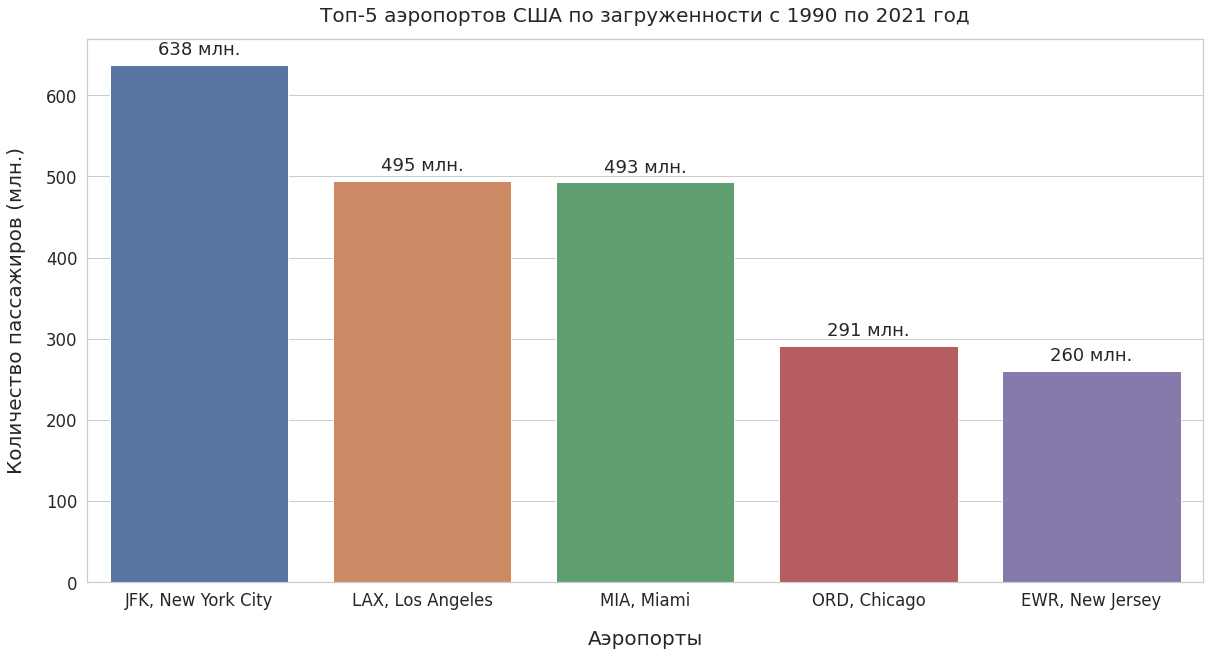

In [33]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid", font_scale=1.5)
ax = sns.barplot(x=df1_31.index, y=df1_31['Total']/1e6, palette="deep",data=df1_31)

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f')+' млн.',(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 15), textcoords = 'offset points')

plt.title('Топ-5 аэропортов США по загруженности с 1990 по 2021 год', size = 20, y = 1.02)
plt.xlabel('Аэропорты', size = 20, labelpad = 20.0)
plt.ylabel('Количество пассажиров (млн.)', size = 20, labelpad = 20.0)
plt.show()

Вопрос 2: Нарисуйте топ 5 популярных иностранных аэропортов (ВНЕ США) за все года (1990-2021). По оси Х на графике укажите код аэропорта + город, в котором он находится (город по коду придется найти в открытых источниках), по оси У - кол-во перевезенных людей за все года.

Ответ:

In [34]:
df1_32 = df1.groupby('fg_apt').sum().sort_values(by=['Total'],ascending=False).reindex().head(5)
df1_32

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
fg_apt,,,,,,,,,,,
LHR,31491640,102064,199261858,751921,203556624,7736156,309500900,6303,329418294,84593,329502887
YYZ,87969670,281380,556049068,1856701,712930136,41011776,884417878,17303,251238312,7447490,258685802
NRT,33618985,108431,216180506,800992,230500624,12343456,330748660,9462,254566322,625094,255191416
FRA,27979675,90995,175486534,615200,164146080,5987982,276145734,5727,174590311,912640,175502951
CDG,23260502,76095,145787808,513624,126606480,4950638,229922888,6464,154561057,554689,155115746


In [35]:
tips32 = {'LHR':'LHR, London', 
        'YYZ':'YYZ, Toronto', 
        'NRT':'NRT, Tokyo', 
        'FRA':"FRA,  Frankfurt", 
        'CDG':'CDG, Paris'}

In [36]:
df1_32.rename(index=tips32,inplace=True)

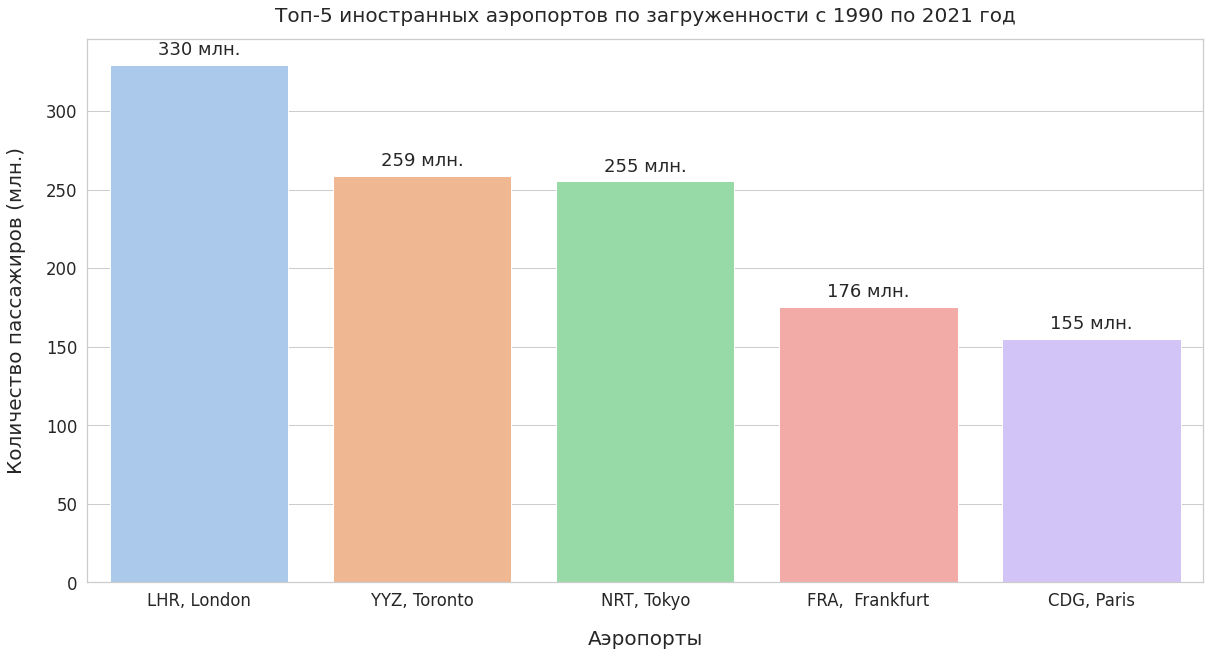

In [37]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid", font_scale=1.5)
ax = sns.barplot(x=df1_32.index, y=df1_32['Total']/1e6, palette="pastel")

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f')+' млн.',(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 15), textcoords = 'offset points')

plt.title('Топ-5 иностранных аэропортов по загруженности с 1990 по 2021 год', size = 20, y = 1.02)
plt.xlabel('Аэропорты', size = 20, labelpad = 20.0)
plt.ylabel('Количество пассажиров (млн.)', size = 20, labelpad = 20.0)
plt.show()

# Задание 4. Подробный анализ загруженности

Вопрос 1: Для каждого года выведите топ месяцев, в которых трафик был максимальным (постарайтесь визуализировать так, чтобы с первого взгляда график был понятен и читался "вне контекста")

Ответ:

In [38]:
df1_4 = df1.copy()
df1_4 = df1_4.set_index(['Year', 'Month'])
df1_4

data_dte  usg_apt_id usg_apt  ...  Scheduled  Charter Total
Year Month                                  ...                          
1990 1      01/01/1990       11042     CLE  ...          0      796   796
     1      01/01/1990       12892     LAX  ...       1790        0  1790
     1      01/01/1990       13495     MSY  ...       1515        0  1515
     1      01/01/1990       12173     HNL  ...       2370        0  2370
     1      01/01/1990       13303     MIA  ...       6489        0  6489
...                ...         ...     ...  ...        ...      ...   ...
2021 3      03/01/2021       99999     ZZZ  ...          0       16    16
     3      03/01/2021       99999     ZZZ  ...          0        9     9
     3      03/01/2021       99999     ZZZ  ...          0       19    19
     3      03/01/2021       99999     ZZZ  ...          0       77    77
     3      03/01/2021       99999     ZZZ  ...          0        8     8

[693122 rows x 14 columns]

In [39]:
traffic = df1_4.groupby(['Year','Month']).Total.sum().unstack()

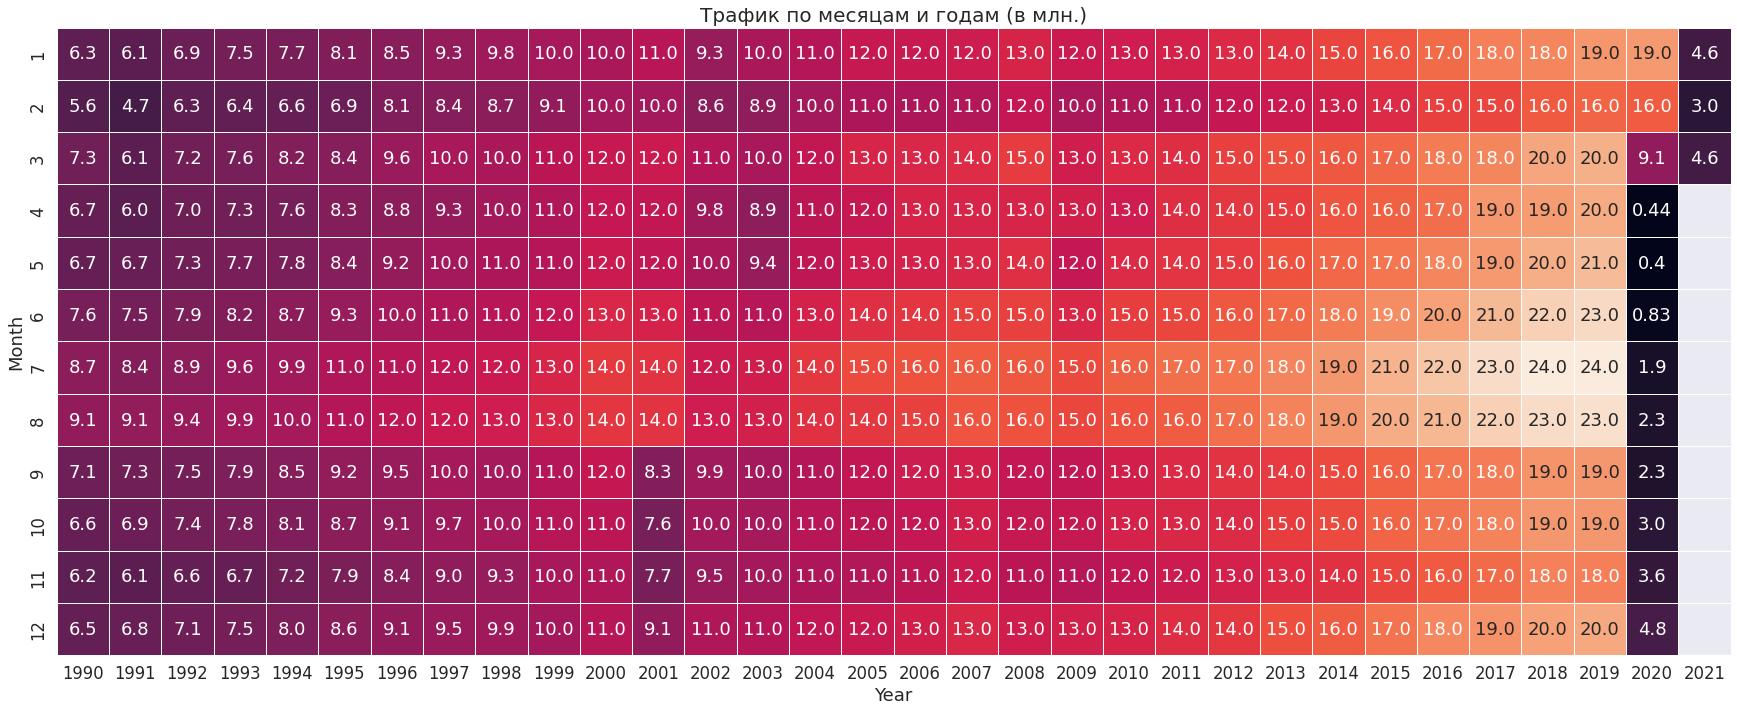

In [40]:
sns.set(font_scale=1.5)
plt.figure(figsize=(30,30))
g = sns.heatmap(traffic.transpose(),
            cbar=False,
            #cmap='magma', 
            annot=True, 
            linewidths=.9,
            square=True,
            )
for t in g.texts: t.set_text(float(t.get_text())/1e6)
plt.title('Трафик по месяцам и годам (в млн.)', size = 20)
plt.show()

ВТОРОЙ ВАРИАНТ

In [41]:
!pip install -U pip
!pip install -U matplotlib

In [42]:
Years = df1.Year.unique()

In [43]:
dict_colors = {1:'lavender',2:'lightblue',3:'dodgerblue',4:'orchid',5:'oliverdrab',6:'moccasin',7:'gold',8:'darkorange',9:'darkorange',10:'tan',11:'grey',12:'steelblue'}

In [44]:
dict_month = {1:'Январь',2:'Февраль',3:'Март',4:'Апрель',5:'Май',6:'Июнь',7:'Июль',8:'Август',9:'Сентябрь',10:'Октябрь',11:'Ноябрь',12:'Декабрь'}

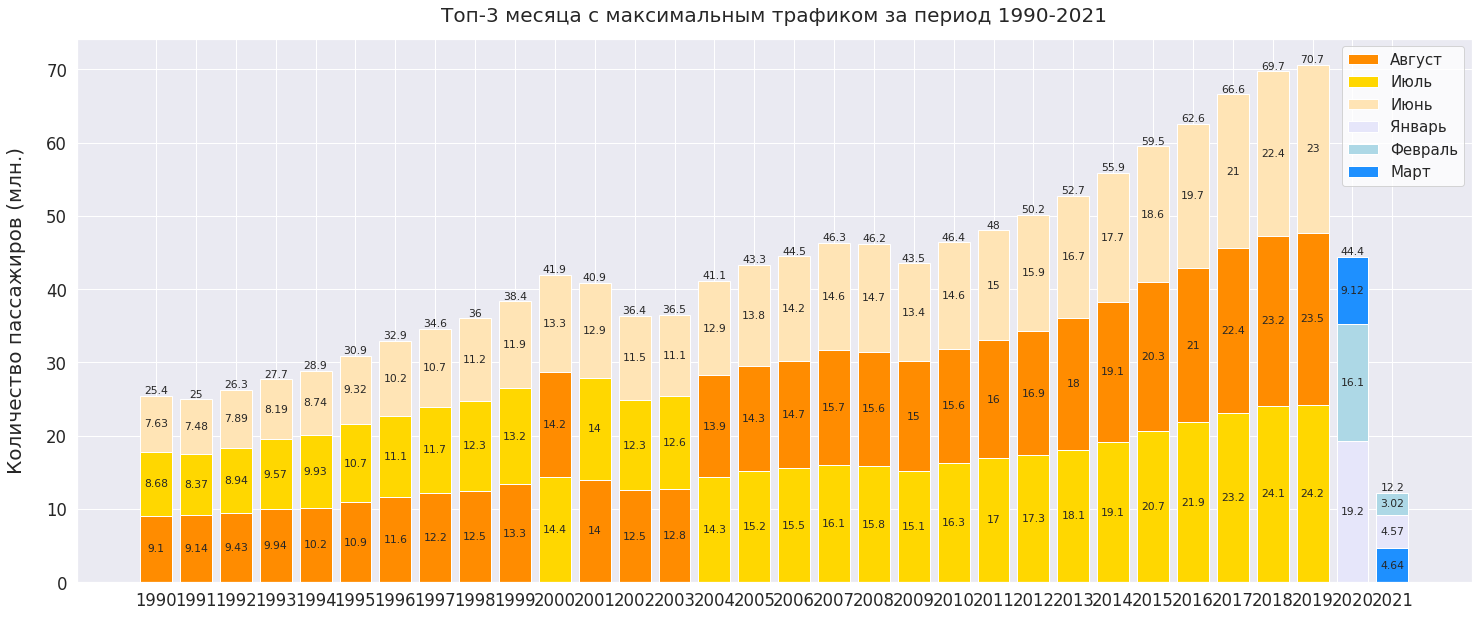

In [45]:
from matplotlib.patches import Patch
width = 0.8      
used_mounth = {}
f, ax = plt.subplots(figsize=(25,10))
sns.set_theme(style="whitegrid", font_scale=0.9)
for i in Years:
    df_0 = df1[df1.Year==i].groupby('Month').sum().sort_values(by=['Total'],ascending=False).head(3).reset_index()
    p1 = ax.bar(i, df_0.Total[0]/1e6, width, color=dict_colors[df_0.Month[0]])
    p2 = ax.bar(i, df_0.Total[1]/1e6, width, color=dict_colors[df_0.Month[1]], bottom=df_0.Total[0]/1e6)
    p3 = ax.bar(i, df_0.Total[2]/1e6, width, color=dict_colors[df_0.Month[2]], bottom=df_0.Total[0]/1e6+df_0.Total[1]/1e6)
    used_mounth[dict_colors[df_0.Month[0]]] = dict_month[df_0.Month[0]]
    used_mounth[dict_colors[df_0.Month[1]]] = dict_month[df_0.Month[1]]
    used_mounth[dict_colors[df_0.Month[2]]] = dict_month[df_0.Month[2]]
    ax.bar_label(p1, label_type='center',fmt='%.3g')
    ax.bar_label(p2, label_type='center',fmt='%.3g')
    ax.bar_label(p3, label_type='center',fmt='%.3g')
    ax.bar_label(p3,fmt='%.3g')

leg = []
for i in used_mounth.keys():
  leg.append(Patch(facecolor=i, label=used_mounth[i]))

plt.title('Топ-3 месяца с максимальным трафиком за период 1990-2021', size = 20, y = 1.02)
plt.ylabel('Количество пассажиров (млн.)', size = 20, labelpad = 20.0)    
ax.legend(handles=leg, fontsize = 15)
plt.xticks(range(1990,2022,1))

plt.show()

Вопрос 2: Есть ли какие-то повторяющиеся месяцы, входящие в топ из года в год (или несколько лет подряд)? Если да, то какие для этого могут быть причины? Выдвиньте несколько гипотез.

Ответ:



1. Как видно, в топе обычно летние месяца, самый "горячий" месяц июль, по моему мнению это связано с летними отпусками;
2. Также "горячие" зимние месяца, по моему мнению из-за новогодних праздников;
3. В феврале 1991 резкий спад трафика, возможно из-за аварии в аэропорту Лос-Анджелеса;
4. В сентябре 2001 года виден резкий упадок трафика, думаю связано это с 11.09.2001;
5. Резкий спад в марте 2020 года из-за ковида, трафик так и не пришёл к прежним годам.

Вопрос 3: Какое кол-во людей (в процентах) потеряли ТОП 5 **авиакомпаний** за период февраль-декабрь 2020 года, в сравнении с периодом февраль-декабрь 2019 года? Отобразите на графике. 

Ответ:

In [46]:
df1_5 = df1.copy()
df1_5 = df1_5[(df1_5.Year == 2019) | (df1_5.Year == 2020)]
df1_5 = df1_5[df1_5.Month >= 2]
df1_5 = df1_5.set_index(['Year', 'Month'])
df1_5

data_dte  usg_apt_id usg_apt  ...  Scheduled  Charter Total
Year Month                                  ...                          
2019 2      02/01/2019       10140     ABQ  ...        369        0   369
     2      02/01/2019       10257     ALB  ...         96        0    96
     2      02/01/2019       10299     ANC  ...          0        8     8
     2      02/01/2019       10299     ANC  ...        161        0   161
     2      02/01/2019       10299     ANC  ...          0        4     4
...                ...         ...     ...  ...        ...      ...   ...
2020 12     12/01/2020       15618     VNY  ...          0        9     9
     12     12/01/2020       99999     ZZZ  ...          0       19    19
     12     12/01/2020       99999     ZZZ  ...          0       11    11
     12     12/01/2020       99999     ZZZ  ...          0       19    19
     12     12/01/2020       99999     ZZZ  ...          0       42    42

[41127 rows x 14 columns]

In [47]:
grouped5 = df1_5.groupby(['Year','carrier']).Total.sum().reset_index().sort_values(by=["Year", "Total"], ascending=False)
top5 = grouped5.carrier[(grouped5.Year == 2019)].head(5).to_list()
grouped5 = pd.concat([grouped5[(grouped5.Year == 2019) & (grouped5.carrier.isin(top5))], grouped5[(grouped5.Year == 2020) & (grouped5.carrier.isin(top5))].head(5)])
carrier_unique = grouped5.carrier.unique()
grouped5 = grouped5.set_index(["Year","carrier"])

traffic_comr = dict()
for c in top5:
  traffic_comr[c] = int(round(grouped5.loc[(2020,c)].Total/grouped5.loc[(2019,c)].Total * 100,0))
df_comr = pd.DataFrame(traffic_comr.items(), columns=['carrier', '%'])
df_comr["Year"] = 2020

for c in top5:
  df_comr = df_comr.append({'carrier':c, '%':100, "Year":2019}, ignore_index = True)
df_comr = df_comr.set_index('carrier')
df_comr = df_comr.rename(index=dict_of_carrier)
df_comr = df_comr.reset_index()
df_comr

,carrier,%,Year
0,American Airlines,25,2020
1,United Airlines,21,2020
2,Delta Air Lines,20,2020
3,JetBlue Airways,30,2020
4,British Airways,14,2020
5,American Airlines,100,2019
6,United Airlines,100,2019
7,Delta Air Lines,100,2019
8,JetBlue Airways,100,2019
9,British Airways,100,2019


In [48]:
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
sns.set(font_scale=1)
grouped55 = grouped5.copy()
grouped55 = grouped55.reset_index()

grouped55 = grouped55.set_index('carrier')
grouped55 = grouped55.rename(index=dict_of_carrier)
grouped55 = grouped55.reset_index()

In [49]:
df_comr_2 = pd.DataFrame(traffic_comr.items(), columns=['carrier', 2020])
df_comr_2[2020] = 100 - df_comr_2[2020]
df_comr_2[2019] = 100
df_comr_2 = df_comr_2.set_index('carrier')
df_comr_2 = df_comr_2.rename(index=dict_of_carrier)
df_comr_2 = df_comr_2.reset_index()
df_comr_2["Total"] = grouped55.Total[grouped55.Year == '2019'] - grouped55.Total[grouped55.Year == '2020']
df_comr_2

,carrier,2020,2019,Total
0,American Airlines,75,100,NaN
1,United Airlines,79,100,NaN
2,Delta Air Lines,80,100,NaN
3,JetBlue Airways,70,100,NaN
4,British Airways,86,100,NaN


In [50]:
abc = grouped5.copy()
abc = abc.reset_index()
abc['max'] = abc.groupby(['carrier']).Total.transform('max')
abc['min'] = abc.groupby(['carrier']).Total.transform('min')
abc['diff'] = abc['max'] - abc['min']
abc = abc.drop(abc[abc.Year == 2019].index)
abc = abc.drop(['max', 'min'], 1)

abc = abc.set_index('carrier')
abc = abc.rename(index=dict_of_carrier)
abc

,Year,Total,diff
carrier,,,
American Airlines,2020,6727169,20702905
United Airlines,2020,5591287,20971065
Delta Air Lines,2020,4724428,19409355
JetBlue Airways,2020,2518338,5827490
British Airways,2020,984572,6018945


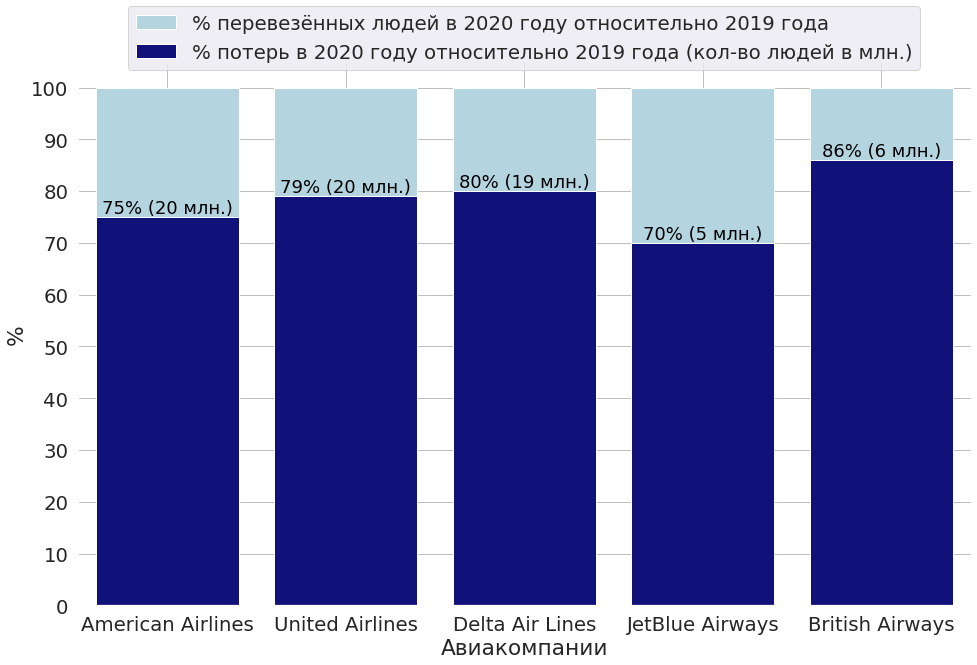

In [51]:
sns.set(font_scale=1.8)
plt.figure(figsize=(16, 10))

df_comr_2_1 = df_comr_2.copy()

df_comr_2_1 = df_comr_2_1.set_index('carrier')
df_comr_2_1['diff'] = abc['diff']
df_comr_2_1 = df_comr_2_1.reset_index()

s1 = sns.barplot(
    x = 'carrier',
    y = 2019,
    data = df_comr_2_1,
    color = 'lightblue',
    label = '% перевезённых людей в 2020 году относительно 2019 года',
    )

s2 = sns.barplot(
    x = 'carrier',
    y = 2020,
    data = df_comr_2_1,
    color = 'darkblue',
    label = '% потерь в 2020 году относительно 2019 года (кол-во людей в млн.)'
    )

for index, row in df_comr_2_1.iterrows():
    s1.text(row.name, row[2020], str(row[2020]) + "% (" + str(int(row['diff']/1e6)) + " млн.)", color='black', ha="center", va="bottom", size=18)


s1.set(xlabel="Авиакомпании", ylabel = "%")
plt.yticks(range(0, 110, 10))
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.12),
    )
plt.grid(color='grey', linewidth=0.5)
s1.set_facecolor(color='w')

plt.show()

Вопрос 4: Предположим, что по предварительным рассчетам (на июнь 2019 года) план по перелетам на февраль-декабрь 2020 года был такой же как на февраль-декабрь 2019 года. Если так, то какие фактические убытки понесли ТОП 5 **авиакомпаний**, если чистая прибыль за 1 человека в среднем = 15$.

Ответ:

In [52]:
df4_4 = df1_5.copy()
df4_4 = df4_4.reset_index()
by_year = df4_4.groupby(['Year','carrier']).Total.sum().reset_index()
by_year = by_year[(by_year.carrier.isin(top5))]
by_year = by_year.groupby('Year').sum()
by_year
Losses = (by_year.Total.loc[2019] - by_year.Total.loc[2020]) * 15
print("За февраль-декабрь 2020 года фактические убытки ТОП 5 авиакомпаний составили {:,}$.".format(Losses))

За февраль-декабрь 2020 года фактические убытки ТОП 5 авиакомпаний составили 1,093,946,400$.


# Задание 5 (Дополнительно)
Здесь Вы можете поэксперементировать - провести собственный анализ, выдвинуть гипотезы относительно данных